<h1> Homework 2 </h1>
Matt Buchovecky  
Astro 283

In [177]:
from scipy import random, optimize, std
from matplotlib import pyplot
%matplotlib inline
import numpy
import csv 

Set of measurements $\left\{Y_{k}\right\}$  
at known locations $\left\{X_{k}\right\}$  
Gaussian uncertainty $\sigma=1.0$  
$p=30\%$ chance of adding constant factor $5.0$  
fit a line $y=a_{0}+a_{1}x$  

we want to find the parameters of the above function that will maximize the measured data given the known points  
$p\left(\vec{z}\bigr|\left\{Y_{k},X_{k},\sigma_{k}\right\}\right) \propto p\left(\left\{Y_{k}\right\}\bigr|\vec{a},\left\{X_{k},\sigma_{k}\right\}\right)p\left(\vec{a}\bigr|\left\{\sigma_{k}\right\}\right)$  

we will assume a uniform or mostly flat prior, ignore the probability of the measurements, and drop the $\sigma$  and $X$ terms, so the likelihood will dominate, and we want to maximize  
$p\left(\vec{a}\bigr|\left\{Y_{k}\right\}\right) \propto p\left(\left\{Y_{k}\right\}\bigr|\vec{a},\right)$  

if the data measurements are independent, then the probability density is separable:  
$p\left(\vec{a}\bigr|\left\{Y_{k}\right\}\right) \propto \prod_{k}p\left(y_{k}|\vec{a}\right)$  

But instead of the standard standalone gaussian distribution, for each data point, we have two mutually exclusive cases. They can be added because they are disjoint, and since they form an exhaustive set, the sum of their probabilities, integrated over the whole parameter space, should equal 1. Since we're just doing a maximization we don't care about normalization, but this means we can write the likelihood for each data point as:  
$p\left(\vec{a}\bigr|y_{k}\right) \propto\left(1-p\right)\exp{\left[-\frac{\left(y_{k}-\left(a_{0}+a_{1}x_{k}\right)\right)^{2}}{2\sigma^{2}}\right]}+p\exp{\left[-\frac{\left(y_{k}-\left(5+a_{0}+a_{1}x_{k}\right)\right)^{2}}{2\sigma^{2}}\right]}$


<h3>Initialize variables and read in the data</h3>

In [178]:
sigma_meas = 1.0 # standard deviation of measurements 
p_err = 0.30 # probability of experimental mistake occurring
err_add = 5.0 # additive increase error 

reader = csv.reader(open('hw2prob1-data.txt','rt'), delimiter = ' ')

x_data = [ ]
y_data = [ ]

for row in reader:
    if len(row) == 0:
        continue
    try:
        float(row[0]) and float(row[1]) and x_data.append(float(row[0]))
        y_data.append(float(row[1]))
    except ValueError:
        continue
    
    
x_data = numpy.asarray(x_data)
y_data = numpy.asarray(y_data)
print(x_data)
print(y_data)

[ 3.  8.  9.]
[ 8.95041659  7.0608713   9.17988634]


<h3>Define the negative of the posterior, as defined above. This is the function to be minimized</h3>

In [79]:
def negative_posterior(a, x, y, sigma, p):
    prob = -1 
    for k in range(0, len(x)):
        prob *= ((1-p)*numpy.exp(-(y[k]-(a[0]+a[1]*x[k]))**2/(2*sigma**2)) + p*numpy.exp(-(y[k]-(5+a[0]+a[1]*x[k]))**2/(2*sigma**2)))
    return prob


/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


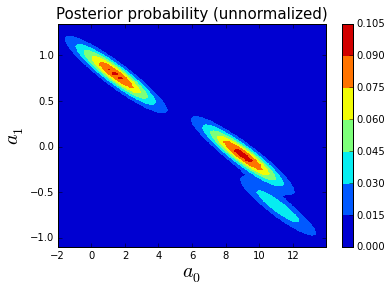

In [206]:
a0 = numpy.arange(-2.0, 14.0, 0.05)
a1 = numpy.arange(-1.1, 1.4, 0.05)
z = numpy.array([[-negative_posterior([i,j], x_data, y_data, sigma_meas, p_err) for i in a0] for j in a1])
contour_plot = pyplot.contourf(a0, a1, z)
pyplot.colorbar()
pyplot.xlabel('$a_0$', fontsize=20)
pyplot.ylabel('$a_1$', fontsize=20)
pyplot.title('Posterior probability (unnormalized)', fontsize=15)

<h3>i)</h3>

In [164]:
guess = [ [ 0.1, 0.1 ] ]
a = [ optimize.fmin(negative_posterior, guess[0], args=(x_data, y_data, sigma_meas, p_err)) ]
print(a_i)
y = [ a[0][0]*numpy.ones(len(x)) + a[0][1]*x_data ]

Optimization terminated successfully.
         Current function value: -0.007710
         Iterations: 63
         Function evaluations: 120
[ 4.0351957  -0.09477656]


<h3>ii)</h3>

In [167]:
def chi_square(a, x, y):
    residuals = numpy.zeros(len(x))
    for k in range(0, len(x)):
        residuals[k] = (y[k]-(a[0]+a[1]*x[k]))
    return numpy.sum(residuals**2)    

In [169]:
guess.append(optimize.fmin(chi_square, guess[0], args=(x_data, y_data)))
print(guess[1])

Optimization terminated successfully.
         Current function value: 2.513964
         Iterations: 69
         Function evaluations: 132
[ 9.03701413 -0.09599332]


In [170]:
a.append(optimize.fmin(negative_posterior, guess_ii, args=(x_data, y_data, sigma_meas, p_err)))
print(a[1])
y.append(a[1][0]*numpy.ones(len(x)) + a[1][1]*x_data)

Optimization terminated successfully.
         Current function value: -0.097612
         Iterations: 23
         Function evaluations: 46
[ 9.03756534 -0.09613447]


<h3>iii)</h3>
The points here are near the visible maxes on the 2D contour plot that have not been found yet

In [171]:
guess[2] = [ 1.9, 0.75 ]
a.append(optimize.fmin(negative_posterior, guess[2], args=(x_data, y_data, sigma_meas, p_err)))
print(a[2])
y.append(a[2][0]*numpy.ones(len(x)) + a[2][1]*x_data)

Optimization terminated successfully.
         Current function value: -0.093569
         Iterations: 37
         Function evaluations: 70
[ 1.45648089  0.79107683]


In [175]:
guess[3] = [ 11.0, -0.6 ]
a.append( optimize.fmin(negative_posterior, guess[3], args=(x_data, y_data, sigma_meas, p_err)) )
print(a[3])
y.append( a[3][0]*numpy.ones(len(x)) + a[3][1]*x_data )

Optimization terminated successfully.
         Current function value: -0.041649
         Iterations: 34
         Function evaluations: 68
[ 11.13123764  -0.65995464]


Plot results

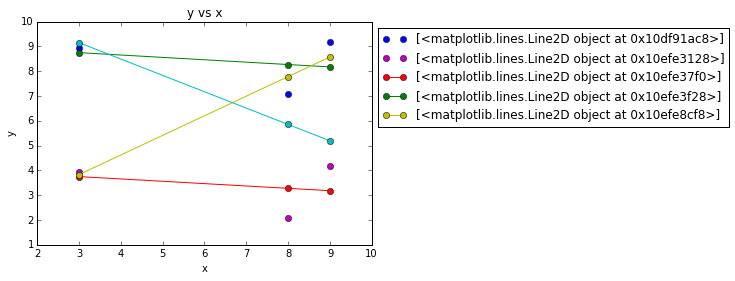

In [194]:
pyplot.title("y vs x")
pyplot.xlabel("x")
pyplot.ylabel("y")
plots = [ pyplot.plot(x_data, y_data, 'bo', label="Measured") ]
plots = [ pyplot.plot(x_data, y_data - 5, 'mo', label="Measured (error)") ]
plots.append( pyplot.plot(x_data, y[0], 'ro-', label="Guess i") )
plots.append( pyplot.plot(x_data, y[1], 'go-', label="Guess ii") )
plots.append( pyplot.plot(x_data, y[2], 'yo-', label="Guess iii") )
plots.append( pyplot.plot(x_data, y[3], 'co-', label="Guess iv") )
pyplot.axis([2.0, 10.0, 1.0, 10.0])
pyplot.legend(plots, loc='center left', bbox_to_anchor=(1., 0.75))


/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


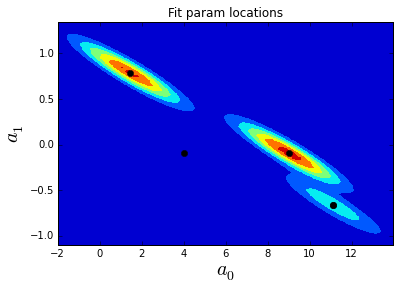

In [190]:
l = len(a)
params_x = []*l
params_y = []*l
for i in range(0, l):
    params_x.append( a[i][0] )
    params_y.append( a[i][1] )
    
pyplot.contourf(a0, a1, z)
pyplot.plot(params_x, params_y, 'ko')

pyplot.xlabel('$a_0$', fontsize=20)
pyplot.ylabel('$a_1$', fontsize=20)
pyplot.title("Fit param locations")


<h3>Results</h3>
We can see that given the proper first guesses, we get the parameters that match the local maxima in the contour plot. The lines of fit y vs x look like lines of best fit that correspond to different sets of 3 points. The sets of points choose for each x, either the measured y, or the measured y before the added error was added, assuming there was one. 